In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_and_preprocess_image(image_path):
    # Load image in color
    image = cv2.imread(image_path)
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray

In [3]:
def detect_optic_nerve(gray):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)
    
    # Use thresholding to find bright regions
    _, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Assume the largest contour is the optic nerve
    if contours:
        optic_nerve_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(optic_nerve_contour)
        optic_nerve_center = (x + w // 2, y + h // 2)
        return optic_nerve_center
    else:
        return None

In [4]:
def detect_macula(gray):
    # Invert the image to make dark regions bright
    inverted = cv2.bitwise_not(gray)
    
    # Use thresholding to find dark regions
    _, thresh = cv2.threshold(inverted, 200, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Assume the largest contour near the center is the macula
    if contours:
        macula_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(macula_contour)
        macula_center = (x + w // 2, y + h // 2)
        return macula_center
    else:
        return None

In [5]:
def detect_notch(image):
    # Convert to grayscale and apply edge detection
    edges = cv2.Canny(image, 50, 150)
    
    # Look for shapes near the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        # Check if the contour is near the edge and has a specific size
        if (x < 10 or x > image.shape[1] - 10 or y < 10 or y > image.shape[0] - 10) and (20 < w < 50 and 20 < h < 50):
            return True  # Notch detected
    return False  # No notch detected


In [6]:
def determine_inversion(optic_nerve_center, macula_center, notch_present):
    if notch_present:
        return "Not Inverted"
    elif optic_nerve_center and macula_center:
        # If macula is higher than optic nerve, the image is inverted
        if macula_center[1] < optic_nerve_center[1]:
            return "Inverted"
        else:
            return "Not Inverted"
    else:
        return "Unable to determine"

In [7]:
def analyze_image_inversion(image_path):
    image, gray = load_and_preprocess_image(image_path)
    
    optic_nerve_center = detect_optic_nerve(gray)
    macula_center = detect_macula(gray)
    notch_present = detect_notch(image)
    
    inversion_status = determine_inversion(optic_nerve_center, macula_center, notch_present)
    
    # Display results
    print(f"Optic Nerve Center: {optic_nerve_center}")
    print(f"Macula Center: {macula_center}")
    print(f"Notch Present: {notch_present}")
    print(f"Inversion Status: {inversion_status}")
    
    # Plot the image with detected points
    if optic_nerve_center:
        cv2.circle(image, optic_nerve_center, 10, (0, 255, 0), -1)
    if macula_center:
        cv2.circle(image, macula_center, 10, (255, 0, 0), -1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
    return inversion_status

Optic Nerve Center: (3228, 904)
Macula Center: (499, 1296)
Notch Present: True
Inversion Status: Not Inverted


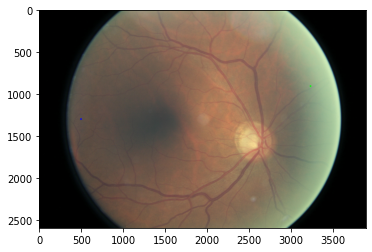

'Not Inverted'

In [10]:
analyze_image_inversion('train/1000_left.jpeg')

# Random dump

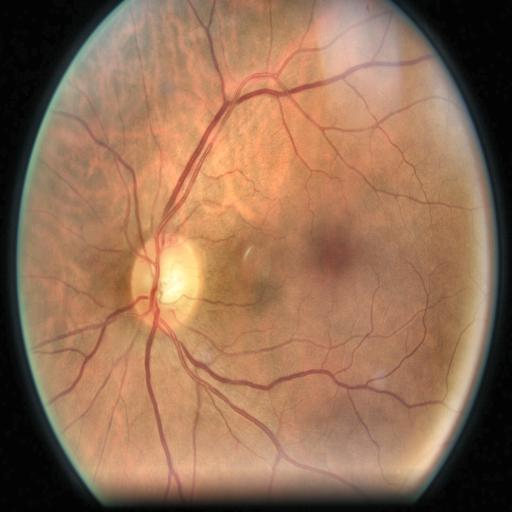

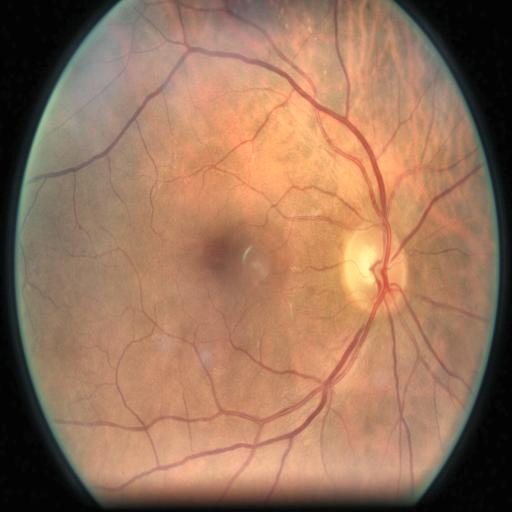

In [4]:
import os
import random
from PIL import Image

file_list = os.listdir('train_prep512/')

file = random.choice([f for f in file_list if '_right' in f])
right_img = Image.open(f'train_prep512/{file}')
right_img.show()

file = file.replace('_right', '_left')
left_img = Image.open(f'train_prep512/{file}')
left_img.show()
